In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/topics_data.csv')


In [ ]:
avg = df.groupby('year:int').mean()
avg

<ipython-input-4-31c24eb30006>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  avg = df.groupby('year:int').mean()


,Unnamed: 0,article:ID,female_count,male_count,Dominant_Topic
year:int,,,,,
1959.0,37234.600000,6.646640e+06,0.000000,1.200000,3.066667
1960.0,36936.437500,6.646277e+06,0.000000,1.125000,3.437500
1961.0,37208.500000,6.646608e+06,0.000000,1.250000,3.250000
1962.0,44162.793103,6.666588e+06,0.000000,1.137931,3.000000
1963.0,50146.952381,6.683931e+06,0.000000,1.238095,2.690476
...,...,...,...,...,...
2019.0,51798.442886,6.689868e+06,0.606424,2.242479,2.013119
2020.0,50241.622113,6.685676e+06,0.634089,2.230111,2.035073
2021.0,51557.480042,6.689209e+06,0.675052,2.244491,2.019543


In [ ]:
X = avg[['female_count', 'male_count']]
X['ratio'] = (avg['female_count']/(avg['female_count']+avg['male_count']))
y = avg.index.values

<ipython-input-5-4581d3a8c069>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['ratio'] = (avg['female_count']/(avg['female_count']+avg['male_count']))


In [ ]:
X['ratio']

year:int
1959.0    0.000000
1960.0    0.000000
1961.0    0.000000
1962.0    0.000000
1963.0    0.000000
            ...   
2019.0    0.212862
2020.0    0.221384
2021.0    0.231218
2022.0    0.220290
2023.0    0.216190
Name: ratio, Length: 65, dtype: float64

In [ ]:
future_years = []
for i in range(2024, 2200):
    future_years.append(i)

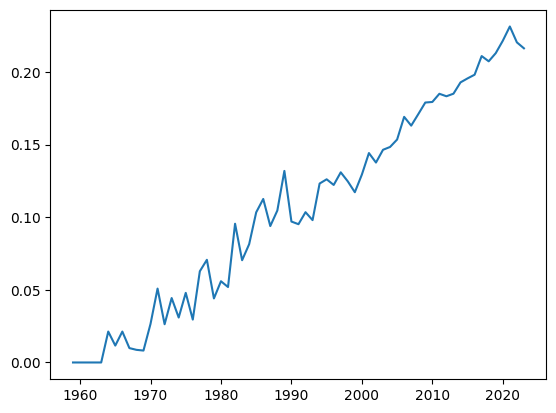

In [ ]:
plt.plot(y, X['ratio'])

In [ ]:
future_years = []
for i in range(2024, 2200):
    future_years.append(i)

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(y.reshape(-1, 1), X['ratio'].values.reshape(-1, 1))

out =reg.predict(np.array(future_years).reshape(-1, 1))


In [ ]:
before_years = list(map(int, avg.index.values))
before_ratio = list(X['ratio'])

for i in future_years:
  before_years.append(i)

for i in out:
  before_ratio.append(i[0])



In [ ]:
ratios = pd.DataFrame(zip(before_years, before_ratio), columns=["Years", "Ratio_Women_to_TotalContributers"])

In [ ]:
ratios.to_csv('/content/drive/MyDrive/ratios.csv')

In [ ]:
ratios[ratios['Ratio_Women_to_TotalContributers'] >= 0.5]

,Years,Ratio_Women_to_TotalContributers
139,2098,0.501910
140,2099,0.505604
141,2100,0.509298
142,2101,0.512992
143,2102,0.516686
...,...,...
236,2195,0.860219
237,2196,0.863913
238,2197,0.867607
239,2198,0.871301


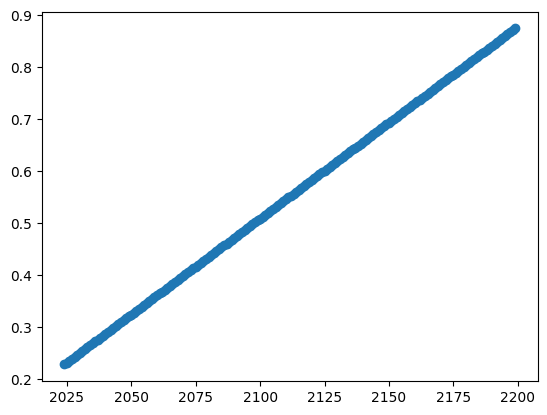

In [ ]:
plt.scatter(future_years,out)

In [ ]:
n = X[X.index > 1960.0]
m = n.index.values
len(n)

63

In [ ]:
future_y = []
for i in range(2015, 2150):
    future_y.append(i)

In [ ]:
reg2 = LinearRegression().fit(m.reshape(-1, 1), n['ratio'].values.reshape(-1, 1))

out2 =reg2.predict(np.array(future_y).reshape(-1, 1))

In [ ]:
out2

array([[0.19570636],
       [0.19943061],
       [0.20315485],
       [0.2068791 ],
       [0.21060334],
       [0.21432759],
       [0.21805183],
       [0.22177608],
       [0.22550032],
       [0.22922456],
       [0.23294881],
       [0.23667305],
       [0.2403973 ],
       [0.24412154],
       [0.24784579],
       [0.25157003],
       [0.25529428],
       [0.25901852],
       [0.26274277],
       [0.26646701],
       [0.27019125],
       [0.2739155 ],
       [0.27763974],
       [0.28136399],
       [0.28508823],
       [0.28881248],
       [0.29253672],
       [0.29626097],
       [0.29998521],
       [0.30370945],
       [0.3074337 ],
       [0.31115794],
       [0.31488219],
       [0.31860643],
       [0.32233068],
       [0.32605492],
       [0.32977917],
       [0.33350341],
       [0.33722765],
       [0.3409519 ],
       [0.34467614],
       [0.34840039],
       [0.35212463],
       [0.35584888],
       [0.35957312],
       [0.36329737],
       [0.36702161],
       [0.370

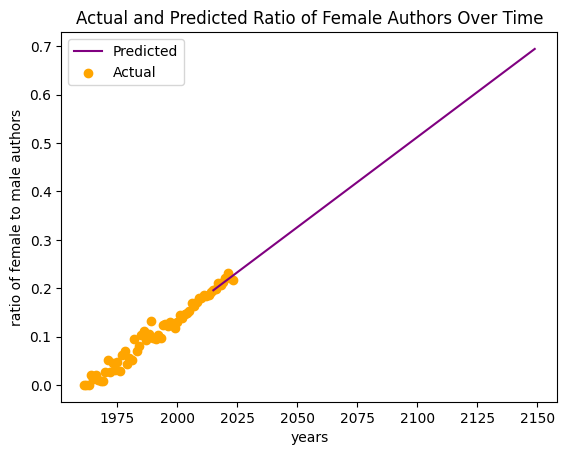

In [ ]:
plt.plot(future_y,out2, c='purple')
plt.scatter(m,n['ratio'], c='orange')
plt.title("Actual and Predicted Ratio of Female Authors Over Time")
plt.xlabel('years')
plt.ylabel('ratio of female to male authors')
plt.legend(['Predicted', 'Actual'])
